In [85]:
import gensim
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.parsing.preprocessing import preprocess_string,remove_stopwords
import jieba
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

In [87]:
#读取两张csv表，并进行合并处理
df1 = pd.DataFrame(pd.read_csv('./first sheet v2.csv'))
df2 = pd.DataFrame(pd.read_csv('./second sheet v2.csv'))
df_total = pd.concat([df1,df2])
df_practice = df_total[['source', 'content']]

In [88]:
#仅保留评论数据
def getText():
    discuss_train = list(df_practice['content'])
    return discuss_train
Text = getText()
# Text

In [143]:
#对评论进行分词、停词操作
#这里的停用词表应该和项目之前的有差异，后期需更换停用词表！！！
def cut_sentence(text):
    stop_list = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]
    stop_list.append("\n")
    result = []
    text = list(text)
    for each in text:
        each_cut = jieba.lcut(each)
        each_result = [word for word in each_cut if word not in stop_list]
        each_result_str =" ".join(str(i) for i in each_result) 
        result.append(each_result_str)
    return result

In [149]:
#对评论进行分词、停词操作,为了后期抽样和可视化的便利，本函数每次仅处理一条评论
#这里的停用词表应该和项目之前的有差异，后期需更换停用词表！！！
def cut_sentence(text):
    stop_list = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]
    stop_list.append("\n")
    each_cut = jieba.lcut(text)
    each_result = [word for word in each_cut if word not in stop_list]
    each_result_str =" ".join(str(i) for i in each_result) 
    return each_result_str

In [150]:
cut_sentence(Text[0])

'人工智能 社会 两个 关键词 高效 透明 高效 不用说 透明 有意思 事情 永远 透明 人有 隐私 明说 事情 东西 挡 点 衣服 遮羞 遮遮掩掩 地方 藏污纳垢 暗箱 操作 暗箱 操作 衣服 遮挡   智商 够 懂 好好 想想 剩 钱 百年 回头 发现 手机 早晚 最反 人类 科技 产品'

In [144]:
#选择对多少量的doc进行分词
#Text_Seg = cut_sentence(Text)
#1000个 
Text_Seg = cut_sentence(Text[0])

In [146]:
list(Text[0])

['人',
 '工',
 '智',
 '能',
 '后',
 '的',
 '社',
 '会',
 '有',
 '两',
 '个',
 '关',
 '键',
 '词',
 '一',
 '个',
 '是',
 '高',
 '效',
 '，',
 '另',
 '一',
 '个',
 '是',
 '透',
 '明',
 '。',
 '高',
 '效',
 '就',
 '不',
 '用',
 '说',
 '了',
 '，',
 '透',
 '明',
 '才',
 '是',
 '最',
 '有',
 '意',
 '思',
 '的',
 '事',
 '情',
 '。',
 '人',
 '永',
 '远',
 '不',
 '可',
 '能',
 '完',
 '全',
 '透',
 '明',
 '，',
 '人',
 '有',
 '隐',
 '私',
 '有',
 '不',
 '可',
 '明',
 '说',
 '的',
 '事',
 '情',
 '。',
 '就',
 '必',
 '须',
 '有',
 '东',
 '西',
 '挡',
 '着',
 '点',
 '，',
 '所',
 '以',
 '就',
 '必',
 '须',
 '有',
 '衣',
 '服',
 '来',
 '遮',
 '羞',
 '，',
 '但',
 '凡',
 '有',
 '遮',
 '遮',
 '掩',
 '掩',
 '的',
 '地',
 '方',
 '，',
 '就',
 '容',
 '易',
 '藏',
 '污',
 '纳',
 '垢',
 '，',
 '有',
 '暗',
 '箱',
 '操',
 '作',
 '，',
 '即',
 '使',
 '你',
 '没',
 '有',
 '暗',
 '箱',
 '操',
 '作',
 '人',
 '们',
 '也',
 '会',
 '认',
 '为',
 '你',
 '有',
 '，',
 '不',
 '然',
 '为',
 '什',
 '么',
 '要',
 '用',
 '衣',
 '服',
 '来',
 '遮',
 '挡',
 '。',
 ' ',
 '所',
 '以',
 '只',
 '要',
 '智',
 '商',
 '够',
 '的',
 '你',
 '们',
 '就',
 '懂',
 '了',
 '吧',
 '，',
 '好',
 '好'

In [129]:
cut_sentence(Text[0])

['',
 '工',
 '智',
 '',
 '',
 '',
 '社',
 '',
 '',
 '两',
 '',
 '关',
 '键',
 '词',
 '',
 '',
 '',
 '高',
 '效',
 '',
 '',
 '',
 '',
 '',
 '透',
 '明',
 '',
 '高',
 '效',
 '',
 '',
 '',
 '说',
 '',
 '',
 '透',
 '明',
 '',
 '',
 '',
 '',
 '意',
 '思',
 '',
 '事',
 '情',
 '',
 '',
 '永',
 '远',
 '',
 '',
 '',
 '完',
 '全',
 '透',
 '明',
 '',
 '',
 '',
 '隐',
 '私',
 '',
 '',
 '',
 '明',
 '说',
 '',
 '事',
 '情',
 '',
 '',
 '',
 '须',
 '',
 '东',
 '西',
 '挡',
 '',
 '点',
 '',
 '',
 '',
 '',
 '',
 '须',
 '',
 '衣',
 '服',
 '',
 '遮',
 '羞',
 '',
 '',
 '',
 '',
 '遮',
 '遮',
 '掩',
 '掩',
 '',
 '',
 '',
 '',
 '',
 '容',
 '易',
 '藏',
 '污',
 '纳',
 '垢',
 '',
 '',
 '暗',
 '箱',
 '操',
 '作',
 '',
 '',
 '',
 '',
 '',
 '',
 '暗',
 '箱',
 '操',
 '作',
 '',
 '',
 '',
 '',
 '认',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '什',
 '',
 '',
 '',
 '衣',
 '服',
 '',
 '遮',
 '挡',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '智',
 '商',
 '够',
 '',
 '',
 '',
 '',
 '懂',
 '',
 '',
 '',
 '',
 '',
 '想',
 '想',
 '',
 '',
 '',
 '',
 '',
 '剩',
 '',
 '少',
 '钱',
 '',
 '',
 '',
 '百',
 '年',
 '',
 '

In [122]:
Text_Seg[1:3]

['人工智能 当代 社会 阻拦 发展 趋势 人工智能 影响 社会 生活 方方面面 人类 衣食住行 改变 改变 传统 产业结构 人员 配置 人类 生活 行业 农业 体育 医疗卫生 制造业 律师 行业 记者 编辑 行业 领域 将会 未来 人工智能 技术 未来 世界 改变 想象 未来 几年 机器人 人工智能 世界 带来 影响 远远 超过 计算 互联网 三十年 间 世界 改变 人工智能 未来 年内 产业 新风 口 I 安钱 电力 颠覆 人类 世界 人工智能 掀起 一场 新 持续 产业革命 事情 发展 两面性 人工智能 发展 百年 前 工业革命 将会 很大 程度 劳动力 转换 过程 中 将会 一系列 阻碍 人工智能 发展 阻力 人工智能 领域 最新 发展 科技 变化 促进作用 会以 两种 方式 搅乱 劳动 市场 大部分 自动化 作业 工人 减少 工作 机会 意味着 血药 工作 地方 变得 少 威胁 显而易见 度量 科技进步 商家 重组 重建 运营 方式 改变 游戏规则 组织 精华 流程 淘汰 工作岗位 淘汰 技能 从总体上 人工智能 带给 未来 人类 世界 好处 大于 弊端 未来 人类 生活 理想 蓝图 中 人工智能 发挥 很大 作用 推动力 这是 阻止 趋势 创业 融资 干货 点击 创业 融资 经验 提交 留言 获 指导 \u200b ySRdRsM 专业 老师 免费 咨询 提交 留言 免费 份 商业 计划书 模板 投资人 名单 份 企业 经营 日常 合同 份 行业 分析 报告 年 行业 经验 老师 指导 助 成功 敲开 投资人 大门',
 '人工智能 高度 发展 未来 人类 意义 东西 独一无二 人类 创造 东西 东西 意义 意义 小说 电影 完 意义 电影 完 浪费时间 英文   kill   time   好莱坞 爆米花 电影   kill   time   某部 电影 泪流满面 情感 特别 震撼 意义 花 时间 票价 电影 故事 感受 一点 人工智能 永远 判断 人工智能 做 写 小说 拍电影 用大 数据 计算 写法 点击率 高 理解 故事 意味着 激发 情感 爱人 写 一封信 封信 文笔 读到 封信 人读 读 流泪 说 街边 树叶 落 记得 那条 街 第一次 这座 城市 见面 手牵手 走过 一条街 话 有没有 意义 电脑 读 封信 完完全全 意义 建构 准确 定义

In [125]:
#根据一个序列，生成对应的挑选出的评论的预处理数据
input_list = [1,3,5,10] #设置一个想要得到的评论的序号列表
Text_seg = list()
for num in input_list:
    Text_seg.append(str(cut_sentence(Text[num])))






In [127]:
str(cut_sentence(Text[1]))

"['', '工', '智', '', '', '', '代', '社', '', '', '', '', '', '', '', '', '阻', '拦', '', '发', '展', '', '趋', '势', '', '', '', '', '工', '智', '', '', '影', '响', '', '运', '', '', '深', '入', '', '', '社', '', '生', '', '', '', '', '面', '面', '', '', '', '类', '', '衣', '食', '住', '行', '产', '生', '', '巨', '', '', '改', '变', '', '', '时', '', '', '改', '变', '', '', '统', '', '', '现', '代', '', '产', '业', '结', '构', '', '', '员', '配', '置', '', '', '', '', '类', '生', '', '', '', '', '行', '业', '例', '', '农', '业', '', '体', '育', '', '医', '疗', '卫', '生', '', '制', '造', '业', '', '律', '师', '行', '业', '', '记', '', '', '编', '辑', '行', '业', '', '领', '域', '', '', '', '', '', '', '', '', '', '未', '', '深', '入', '', '', '', '工', '智', '', '技', '术', '', '', '', '', '未', '', '世', '界', '', '改', '变', '', '巨', '', '', '', '', '法', '想', '象', '', '', '', '', '', '未', '', '', '年', '', '', '机', '器', '', '', '', '工', '智', '', '', '', '世', '界', '', '', '', '影', '响', '', '远', '远', '超', '', '', '', '计', '算', '', '', '联', '网', '', '', '', '', '十', '

In [91]:
#将句子转化为符合gensim.models.Doc2Vec库要求的格式
TaggededDocument = gensim.models.doc2vec.TaggedDocument
def X_train(seg_Text):
    x_train = []
    for i,text in enumerate(seg_Text):
        word_list = text.split(' ')
        length = len(word_list)
        word_list[length-1]=word_list[length-1].strip()
        document = TaggededDocument(word_list,tags=[i])
        x_train.append(document)
    return x_train

In [95]:
#Text_pred保存了格式规范化后的训练数据
Text_pred = X_train(Text_Seg)

In [97]:
#doc2vec正式训练
model = gensim.models.Doc2Vec(vector_size=300, window=10, min_count=5,
                            workers=4, alpha=0.025, min_alpha=0.025, epochs=12)
model.build_vocab(Text_pred)
print("开始训练...")
# 训练模型
model.train(Text_pred, total_examples=model.corpus_count, epochs=12)
model.save("doc2vec.model")
print("model saved")

开始训练...
model saved


In [98]:
 #根据训练得到的模型，将文本转化为向量
def sent2vec(model, words):
    vect_list = []
    for w in words:
        try:
            vect_list.append(model.wv[w])
        except:
            continue
    vect_list = np.array(vect_list)
    vect = vect_list.sum(axis=0)
    return vect / np.sqrt((vect ** 2).sum()) 

In [99]:
#将句向量结果用Dataframe格式保存
doc_num2vec_dict = dict() #创建一个序号对应向量的字典
for item in range(1000):  #选400个出来试试降维哈
    doc_num2vec_dict[item] = sent2vec(model,Text[item])
    
matrix = pd.DataFrame() #
for i in range(1000):
    try:
        array_i = pd.DataFrame(sent2vec(model,Text[i])).T
        matrix = pd.concat([matrix,array_i],axis=0,ignore_index=True)
    except:
        array_i = pd.DataFrame(np.zeros(300)).T
        matrix = pd.concat([matrix,array_i],axis=0,ignore_index=True)

In [100]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.008217,0.091438,-0.008778,-0.028407,0.115533,-0.079117,0.005617,0.108007,0.027574,-0.080118,...,0.003303,0.113347,0.144685,-0.033494,0.157698,0.085354,-0.062462,-0.028206,0.031838,0.004803
1,0.003788,0.073980,0.026799,0.031584,0.055457,-0.092988,0.049134,0.152833,-0.002302,-0.064891,...,-0.010007,0.110311,0.141092,-0.036232,0.142744,0.088311,-0.031431,-0.042218,-0.002668,-0.001424
2,0.004310,0.058259,0.019457,-0.006318,0.050621,-0.102515,0.013532,0.096265,0.026267,-0.057801,...,-0.002895,0.155849,0.158402,-0.037518,0.139968,0.118152,-0.050079,-0.014893,0.021142,0.035582
3,0.013267,0.066390,0.004799,0.014403,0.076687,-0.114319,0.021139,0.105127,0.008622,-0.053327,...,-0.013489,0.131101,0.119045,-0.041835,0.126768,0.106288,-0.035669,-0.021893,-0.027616,0.050221
4,0.012029,0.058448,0.056646,0.036512,0.036136,-0.114801,0.040306,0.133589,0.005121,-0.069806,...,-0.025870,0.128019,0.143206,-0.044234,0.130151,0.107522,-0.032511,-0.037703,0.004830,0.022030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.001285,0.069029,0.036336,0.021515,0.056764,-0.114862,0.019698,0.118283,0.015999,-0.058545,...,-0.015692,0.135455,0.140090,-0.050701,0.136667,0.116058,-0.053684,-0.026837,0.006213,0.029913
996,0.016263,0.059331,0.059124,0.043724,0.033363,-0.110015,0.043591,0.138218,-0.000820,-0.067004,...,-0.031298,0.120364,0.154581,-0.054167,0.128972,0.114905,-0.026718,-0.051389,0.003690,0.014229
997,-0.000405,0.062788,-0.001532,0.016961,0.054230,-0.066687,0.023444,0.096877,0.032965,-0.075980,...,-0.026306,0.152998,0.152324,-0.046559,0.153184,0.123585,-0.035207,-0.038189,0.029231,0.040786
998,0.031957,0.050641,0.067202,0.007415,0.069393,-0.133097,0.030211,0.110076,0.018515,-0.050393,...,-0.012054,0.118869,0.113920,-0.038657,0.092428,0.117067,-0.035126,-0.013495,-0.027413,0.045609


In [101]:
#PCA降维
from sklearn.decomposition import PCA
Y = matrix.index.values.tolist()
pca = PCA(n_components=2) 
pca = pca.fit(matrix)  # 拟合模型
matrix_ld = pd.DataFrame(pca.transform(matrix))  # 获取降维后的新矩阵

In [ ]:
#获取评论对应的平台
def getSource:
    label = df_total
    subtotal = label.groupby(['source']).count()
    print(subtotal)
    #平台来源编码
    label.loc[label['source']=="微博",['source']] = 0 
    label.loc[label['source']=="知乎问答",['source']] = 1
    label.loc[label['source']=="简书文章",['source']] = 2 
    label.loc[label['source']=="豆瓣日记",['source']] = 3 
    label_targets = label['source'] #label_targets用来表示平台来源
    label_targets = pd.DataFrame(label_targets)
    label_targets[0:1000]
    
    
    

In [114]:
label = df_total
subtotal = label.groupby(['source']).count()
print(subtotal)

        Unnamed: 0  link  title_link  title_link-href  topics  author  \
source                                                                  
0                0     0           0                0       0   51442   
1                0  7019        7019             7019    7019    7019   
2                0  6474        6474             6474       0    6474   
3                0  2313        2313             2313       0    2313   

        author_info  content  support   time  
source                                        
0                 0    51442        0  51442  
1              4719     7019        0   7019  
2                 0     6474     6474   6474  
3                 0     2313      505   2313  


In [103]:
#平台来源编码
label.loc[label['source']=="微博",['source']] = 0 
label.loc[label['source']=="知乎问答",['source']] = 1
label.loc[label['source']=="简书文章",['source']] = 2 
label.loc[label['source']=="豆瓣日记",['source']] = 3 

In [104]:
label_targets = label['source'] #label_targets用来表示平台来源
label_targets = pd.DataFrame(label_targets)
label_targets[0:1000]

,source
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [112]:
final = pd.concat([matrix_ld,label_targets[0:1000]],axis=1)

In [22]:
#可视化
import matplotlib.pyplot as plt

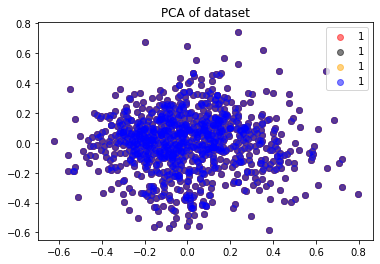

In [113]:
plt.figure()  # 画布
colors = ['red', 'black', 'orange','blue']
for i in [0,1,2,3]:
    plt.scatter(x=final.iloc[:,0],
                y=final.iloc[:,1],
                c=colors[i],
                alpha=0.5,  # 图表的填充不透明度(0到1之间)
                label=final['source'][i]
                )
plt.legend()  # 显示图例
plt.title('PCA of dataset')  # 设置标题
plt.show()


In [1]:
df = pd.concat([df1,df2])
df = df[['source', 'content']]
label = df
subtotal = label.groupby(['source']).count()
print(subtotal)

NameError: name 'pd' is not defined

In [414]:
label.loc[label['source']=="微博",['source']] = 0 
label.loc[label['source']=="知乎问答",['source']] = 1
label.loc[label['source']=="简书文章",['source']] = 2 
label.loc[label['source']=="豆瓣日记",['source']] = 3 

In [416]:
label_targets = label['source']

In [418]:
label_targets = label_targets[0:200]